## Observations and Insights 

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

pd.options.display.float_format = '{:,.2f}'.format # Set formatting

# Display the data table for preview
merge_df.head()

merge_df_mouse = merge_df.loc[merge_df["Mouse ID"] =='b128']
merge_df_mouse

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
300     b128    Capomulin  Female           9          22          0   
301     b128    Capomulin  Female           9          22          5   
302     b128    Capomulin  Female           9          22         10   
303     b128    Capomulin  Female           9          22         15   
304     b128    Capomulin  Female           9          22         20   
305     b128    Capomulin  Female           9          22         25   
306     b128    Capomulin  Female           9          22         30   
307     b128    Capomulin  Female           9          22         35   
308     b128    Capomulin  Female           9          22         40   
309     b128    Capomulin  Female           9          22         45   

     Tumor Volume (mm3)  Metastatic Sites  
300               45.00                 0  
301               45.65                 0  
302               43.27                 0  
303               43.78                 0  
304               42.73                 0  
305               43.26                 1  
306               40.61                 1  
307               37.97                 1  
308               38.38                 2  
309               38.98                 2

In [40]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())


249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_Df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]

duplicated_ids_df = pd.DataFrame({"Duplicated Mouse IDs": duplicates_Df["Mouse ID"].unique()  })
duplicated_ids_df

Duplicated Mouse IDs
0                 g989

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates_Df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909               45.00                 0  
911               47.57                 0  
913               49.88                 0  
915               53.44                 0  
917               54.66                 1

In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merge_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]

clean_merge_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0               45.00                 0  
1               38.83                 0  
2               35.01                 1  
3               34.22                 1  
4               33.00                 1

In [44]:
# Checking the number of mice in the clean DataFrame.
len(clean_merge_df["Mouse ID"].unique())

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_groupby = clean_merge_df.groupby('Drug Regimen')

#drug_regimen_groupby_df = pd.DataFrame({"Tumor Volume": drug_regimen_groupby["Tumor Volume (mm3)"]})

tumor_vol_df = pd.DataFrame({"Mean" : drug_regimen_groupby["Tumor Volume (mm3)"].mean(), 
                             "Median" : drug_regimen_groupby["Tumor Volume (mm3)"].median(),
                            "Mode" : drug_regimen_groupby["Tumor Volume (mm3)"].agg(pd.Series.mode), 
                             "Variance" : drug_regimen_groupby["Tumor Volume (mm3)"].var(),
                             "Standard Dev" : drug_regimen_groupby["Tumor Volume (mm3)"].std(),
                             "SEM" : drug_regimen_groupby["Tumor Volume (mm3)"].sem()             })    

tumor_vol_df


Mean  Median  Mode  Variance  Standard Dev  SEM
Drug Regimen                                                 
Capomulin    40.68   41.56 45.00     24.95          4.99 0.33
Ceftamin     52.59   51.78 45.00     39.29          6.27 0.47
Infubinol    52.88   51.82 45.00     43.13          6.57 0.49
Ketapril     55.24   53.70 45.00     68.55          8.28 0.60
Naftisol     54.33   52.51 45.00     66.17          8.13 0.60
Placebo      54.03   52.29 45.00     61.17          7.82 0.58
Propriva     52.32   50.45 45.00     43.85          6.62 0.54
Ramicane     40.22   40.67 45.00     23.49          4.85 0.32
Stelasyn     54.23   52.43 45.00     59.45          7.71 0.57
Zoniferol    53.24   51.82 45.00     48.53          6.97 0.52

In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_df.agg(["mean"])




Mean  Median  Mode  Variance  Standard Dev  SEM
mean 50.98   49.90 45.00     47.86          6.82 0.50

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Measurements')

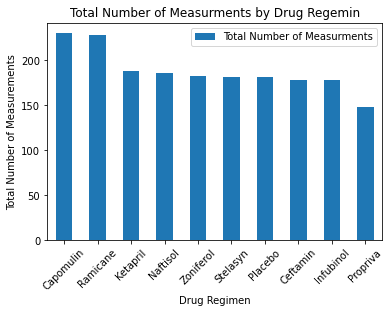

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_df = pd.DataFrame({"Total Number of Measurments" : clean_merge_df["Drug Regimen"].value_counts()})
#drug_regimen_df

drug_regimen_bar1 = drug_regimen_df.plot.bar(y="Total Number of Measurments", rot=45)
drug_regimen_bar.set_title("Total Number of Measurments by Drug Regemin")
drug_regimen_bar.set_xlabel("Drug Regimen")
drug_regimen_bar.set_ylabel("Total Number of Measurements")

(0.0, 255.0)

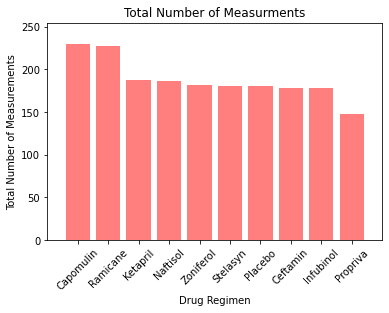

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
plt.bar(drug_regimen_df.index, drug_regimen_df["Total Number of Measurments"], color='r', alpha=0.5, align="center")

tick_locations = [value for value in drug_regimen_df.index]
plt.xticks(tick_locations, drug_regimen_df.index, rotation=45)
plt.title("Total Number of Measurments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xlim(-1, len(drug_regimen_df.index))
plt.ylim(0, max(drug_regimen_df["Total Number of Measurments"])+25)


(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

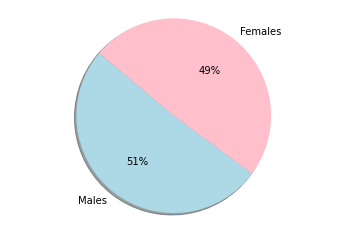

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels = ["Males", "Females"]
gender_counts = clean_merge_df["Sex"].value_counts()
colors = ["lightblue", "pink"]
#explode = (0, 0.05, 0, 0)
plt.pie(gender_counts, labels=labels, colors=colors,
autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis("equal")

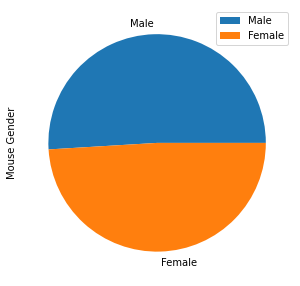

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender_df = pd.DataFrame({"Mouse Gender" : clean_merge_df["Sex"].value_counts()})

mouse_gender_pie = mouse_gender_df.plot.pie(y="Mouse Gender", figsize=(5,5))
#mouse_gender_df

## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


mouse_final_vol = clean_merge_df.loc[clean_merge_df.groupby(['Drug Regimen', 'Mouse ID'])["Timepoint"].idxmax()]  
mouse_final_vol



Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
309      b128    Capomulin  Female           9          22         45   
299      b742    Capomulin    Male           7          21         45   
64       f966    Capomulin    Male          16          17         20   
244      g288    Capomulin    Male           3          19         45   
360      g316    Capomulin  Female          22          22         45   
...       ...          ...     ...         ...         ...        ...   
1434     q633    Zoniferol    Male          12          25         45   
1518     s337    Zoniferol    Male          14          27         45   
1660     w140    Zoniferol  Female          19          30          5   
1719     w575    Zoniferol  Female          16          28         45   
1777     x613    Zoniferol  Female           2          29         15   

      Tumor Volume (mm3)  Metastatic Sites  
309                38.98                 2  
299                38.94                 0  
64                 30.49                 0  
244                37.07                 1  
360                40.16                 2  
...                  ...               ...  
1434               70.83                 2  
1518               62.11                 4  
1660               47.72                 0  
1719               68.40                 3  
1777               48.08                 0  

[248 rows x 8 columns]

In [165]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = mouse_final_vol["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in drug_regiments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    regimen_specific_rows = mouse_final_vol.loc[merge_df["Drug Regimen"] == regimen]
    
    # add subset 
    
    tumor_vol_data.append(regimen_specific_rows)
    
    # Determine outliers using upper and lower bounds
    
    
    

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
